In [4]:
%load_ext autoreload
%autoreload 2
import json
import pandas as pd
import numpy as np
import html
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from transformers import AutoTokenizer

from find_high_kl import *

# --- Configuration ---
OUTPUT_FILE_JSONL = "high_kl_contexts.jsonl" # Make sure this matches the output file from the script
TOP_N_TO_DISPLAY = 20
# Optional: Set a fixed maximum KL value for the color scale across all visualizations
# Set to None to auto-calculate based on the 95th percentile of the current results.
MAX_KL_FOR_COLOR_SCALE = 10

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
tokenizer = AutoTokenizer.from_pretrained("google/gemma-2-9b-it")

Loading results from high_kl_contexts.jsonl...
Loaded 10 results.
Displaying Top 10 Contexts (Highlight intensity scaled up to KL=10.00):
--------------------------------------------------------------------------------

--- Details for Context 1 (Original Index: b0329533aa0c4345964f0f5bcacca14c) ---
Max KL: 2.2656 (occurs after token 175: '▁and', predicting token 176: '▁tolu')

  Token         P_A     P_B
  -------------------------
  ▁toluene    0.000   0.032
  ▁phenyl     0.000   0.087
  ▁pyridine   0.000   0.047
  -------------------------
  ▁ethyl      0.445   0.028
  ▁guan       0.068   0.002
  ▁mal        0.164   0.003
--------------------------------------------------------------------------------

--- Details for Context 2 (Original Index: 8ad66650dced4b728de1d14bb04657c1) ---
Max KL: 1.8438 (occurs after token 158: '
', predicting token 159: 'let')

  Token         P_A     P_B
  -------------------------
  interface   0.002   0.071
  const       0.010   0.194
  type        0.0


--- Example: Accessing Loaded Data ---
Example: Accessing the result with original index: 33f01939a744455c869cb234afca47f1
Max KL value: 1.3750

DataFrame created from results (showing first 5 rows):


,original_index,text,token_ids,tokens,kl_values,max_kl_value,max_kl_token_index,top_tokens_A_contrib,top_tokens_B_contrib
0,33f01939a744455c869cb234afca47f1,<bos><start_of_turn>user\nhow can identity pro...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[<pad>, <pad>, <pad>, <pad>, <pad>, <pad>, <pa...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1.375000,241,"[{'Token': '▁Restoration', 'Contribution': 1.2...","[{'Token': '▁Security', 'Contribution': 0.1435..."
1,0f623736051f4a48a506fd5933563cfd,<bos><start_of_turn>user\nYou are the text com...,"[2, 2, 106, 1645, 108, 2045, 708, 573, 2793, 1...","[<bos>, <bos>, <start_of_turn>, user, \n, You,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.878906,107,"[{'Token': '▁repeatedly', 'Contribution': 0.59...","[{'Token': '.', 'Contribution': 0.8125, 'P_A':..."
2,8ad66650dced4b728de1d14bb04657c1,<bos><start_of_turn>user\nWhat is the type of ...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 106, 1645...","[<pad>, <pad>, <pad>, <pad>, <pad>, <pad>, <pa...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1.843750,159,"[{'Token': '():', 'Contribution': 1.3828125, '...","[{'Token': 'const', 'Contribution': 0.5859375,..."
3,aa041ed88edd4100bde61b8d68fc7288,<bos><start_of_turn>user\nI have 1000 document...,"[2, 2, 106, 1645, 108, 235285, 791, 235248, 23...","[<bos>, <bos>, <start_of_turn>, user, \n, I, ▁...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1.421875,98,"[{'Token': '▁a', 'Contribution': 1.640625, 'P_...","[{'Token': '▁the', 'Contribution': 1.296875, '..."
4,2d9631f925044e47abcc147e64a0268e,<bos><start_of_turn>user\nPlease focus on prep...,"[2, 2, 106, 1645, 108, 5958, 6045, 611, 20553,...","[<bos>, <bos>, <start_of_turn>, user, \n, Plea...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1.757812,262,"[{'Token': '▁realized', 'Contribution': 1.1171...","[{'Token': '▁started', 'Contribution': 0.29492..."


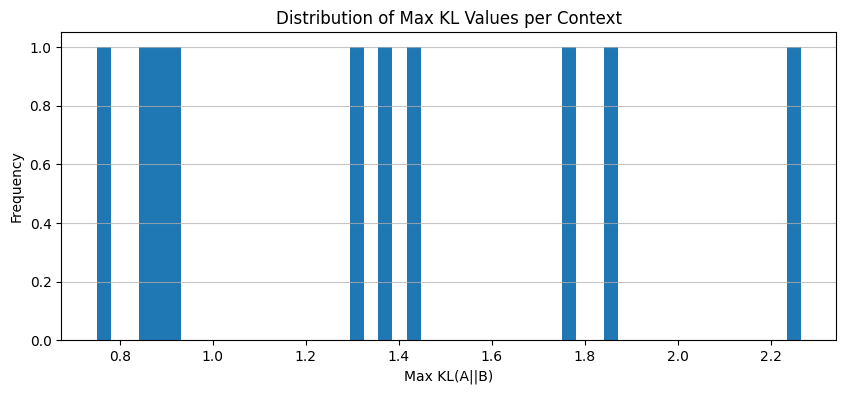

In [7]:
# --- Load and Display Results ---
print(f"Loading results from {OUTPUT_FILE_JSONL}...")
all_high_kl_results = load_results_from_jsonl(OUTPUT_FILE_JSONL)

if all_high_kl_results:
    print(f"Loaded {len(all_high_kl_results)} results.")
    display_top_contexts(all_high_kl_results, tokenizer, top_n=TOP_N_TO_DISPLAY, max_kl_for_color_scale=MAX_KL_FOR_COLOR_SCALE)

    # --- Further Analysis Example ---
    print("\n--- Example: Accessing Loaded Data ---")
    # The results are loaded into the 'all_high_kl_results' list of dictionaries.
    # You can access individual results like this:
    if len(all_high_kl_results) > 0:
        first_result = all_high_kl_results[0] # Get the highest KL result (since it's sorted for display)
        print(f"Example: Accessing the result with original index: {first_result.get('original_index')}")
        print(f"Max KL value: {first_result.get('max_kl_value'):.4f}")
        # print(f"Tokens: {first_result.get('tokens')[:20]}...") # Print first few tokens
        # print(f"KL Values: { [f'{k:.2f}' for k in first_result.get('kl_values', [])[:20]] }...") # Print first few KL values

        # You can convert the list of results to a Pandas DataFrame for easier analysis:
        try:
            df_results = pd.DataFrame(all_high_kl_results)
            print("\nDataFrame created from results (showing first 5 rows):")
            display(df_results.head())
            
            # Example: Plot distribution of max KL values
            if 'max_kl_value' in df_results.columns:
                plt.figure(figsize=(10, 4))
                plt.hist(df_results['max_kl_value'].dropna(), bins=50)
                plt.title('Distribution of Max KL Values per Context')
                plt.xlabel('Max KL(A||B)')
                plt.ylabel('Frequency')
                plt.grid(axis='y', alpha=0.75)
                plt.show()

        except Exception as e:
            print(f"Could not create or display DataFrame/Plot: {e}")

else:
    print("No results were loaded. Cannot perform analysis.")